# Stochastic Gradient Descent from popular libraries

## Imports

In [1]:
from sklearn.preprocessing import StandardScaler
from src.helpers import *

## Getting data

In [2]:
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
keras.utils.set_random_seed(42)

x, y = load_california()
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(-1, 1)).ravel()

x_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=42)

xtr_t, xte_t = map(torch.FloatTensor, (x_tr, X_te))
ytr_t, yte_t = map(lambda v: torch.FloatTensor(v.reshape(-1, 1)), (y_tr, y_te))

xtr_tf, xte_tf = map(lambda a: tf.convert_to_tensor(a, tf.float32), (x_tr, X_te))
ytr_tf, yte_tf = map(lambda v: tf.convert_to_tensor(v.reshape(-1, 1), tf.float32), (y_tr, y_te))

## Defining hyperparameters

In [3]:
EPOCHS, BATCH = 20, 32
LR = {
    "SGD":          1e-3,
    "SGD+Momentum": 1e-3,
    "SGD+Nesterov": 1e-3,
    "Adagrad":      1e-3,
    "RMSprop":      1e-3,
    "Adam":         1e-3,
}

## Training models and plotting results

2025-05-22 11:59:45.096273: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 11:59:45.997684: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 11:59:48.448799: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 11:59:52.019014: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 12:00:00.077920: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 12:00:18.418973: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-22 12:00:56.788328: I tensorflow/core/framework/local_rendezvous.cc:407] L

Opt            Framework   MSE           Time(s)  Mem(MB) 
-----------------------------------------------------------
SGD            PyTorch     4.2123e-01    1.46     9.75    
SGD+Momentum   PyTorch     4.2521e-01    1.41     0.05    
SGD+Nesterov   PyTorch     4.2643e-01    1.43     0.05    
Adagrad        PyTorch     1.2179e+00    1.59     0.30    
RMSprop        PyTorch     4.3349e-01    1.51     0.08    
Adam           PyTorch     4.3014e-01    1.63     0.44    
SGD            TensorFlow  4.1110e-01    20.31    0.00    
SGD+Momentum   TensorFlow  4.2809e-01    22.67    1.30    
SGD+Nesterov   TensorFlow  4.2336e-01    24.29    0.30    
Adagrad        TensorFlow  1.8951e+00    23.23    0.61    
RMSprop        TensorFlow  4.9272e-01    33.11    0.00    
Adam           TensorFlow  4.2431e-01    30.58    20.19   


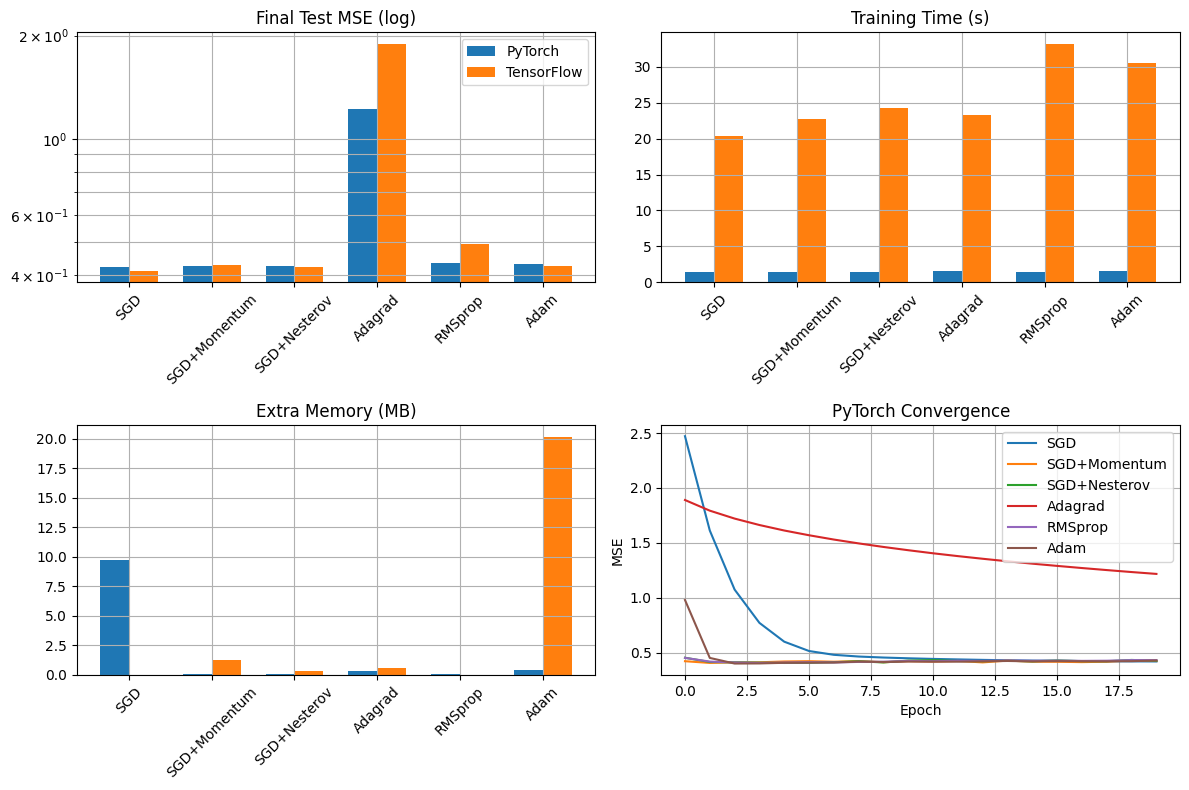

In [4]:
optimisers = ["SGD", "SGD+Momentum", "SGD+Nesterov", "Adagrad", "RMSprop", "Adam"]
results = []

for opt_name in optimisers:
    results.append(
        train_torch(opt_name, xtr_t, ytr_t, xte_t, yte_t, EPOCHS, BATCH, LR)
    )

for opt_name in optimisers:
    results.append(
        train_tf(opt_name, xtr_tf, ytr_tf, xte_tf, yte_tf, EPOCHS, BATCH, LR)
    )

summarise(results)
plot(results)